# LevelShiftAD algorithm
Learn how to detect anomalous CPU behavior using the [LevelShiftAD aglorithm](https://adtk.readthedocs.io/en/stable/notebooks/demo.html#LevelShiftAD) 

LevelShiftAD detects shift of value level by tracking the difference between median values at two sliding time windows next to each other. It is not sensitive to instantaneous spikes and could be a good choice if noisy outliers happen frequently.

## Step One:
Import Dependencies

In [1]:
import pandas as pd
import matplotlib.pyplot as plot

## Step Two:  Convert data to a DataFrame 

Convert data from one of the following sources:

- InfluxDB 

- CSV


### To convert from InfluxDB
Use the Python InfluxDB Client to query data and return it as a Panda DataFrame. For more information, [Getting Started with InfluxDB and Pandas](../Getting_Started_with_InfluxDB_and_Pandas.ipynb). Then continue to Step 3.

### To convert from CSV
Run the following code to convert csv data to a Panda DataFrame:

In [2]:
s = pd.read_csv('./sample_data/sample-data.csv')

## Step Three: Prepare Data

To prepare the DataFrame to be consumed by our mad() function, run the following code to do the following:

- Drop the label column
- Convert the timestamp column to a pandas datetime object
- Set the timestampe column as the index

In [3]:
s.drop(['label'], axis=1, inplace=True)
s["timestamp"] = pd.to_datetime(s["timestamp"], unit='s')
s = s.set_index("timestamp")
s.head()

,value
timestamp,
2016-07-24 16:00:00,0.847300
2016-07-24 16:05:00,-0.036137
2016-07-24 16:10:00,0.074292
2016-07-24 16:15:00,0.074292
2016-07-24 16:20:00,-0.036137


###  To visualize the data 
Run the following code to visualize the data:

<AxesSubplot:xlabel='timestamp'>

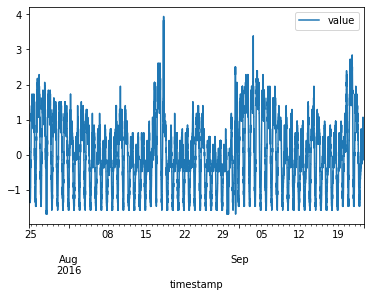

In [4]:
s.plot()

## Step Four: Apply LevelShiftAD

Use the [ADTK LevelShiftAD](https://adtk.readthedocs.io/en/stable/notebooks/demo.html#LevelShiftAD) function to find anomalies in the data.

In [5]:
from adtk.data import validate_series
# This functoin will check some common critical issues of time series that may cause problems if anomaly detection is performed without fixing them. The function will automatically fix some of them and raise errors for the others.
# Issues will be checked and automatically fixed include:
# Time index is not mon## Step Four: Apply AutoregressionAD

Use the [ADTK AutoregressionAD](https://adtk.readthedocs.io/en/stable/notebooks/demo.html#AutoregressionAD) function to find anomalies in the data.otonically increasing;
# Time index contains duplicated time stamps (fix by keeping first values);
# (optional) Time index attribute freq is missed while the index follows a frequency;
# (optional) Time series include categorical (non-binary) label columns (to fix by converting categorical labels into binary indicators).

s = validate_series(s)

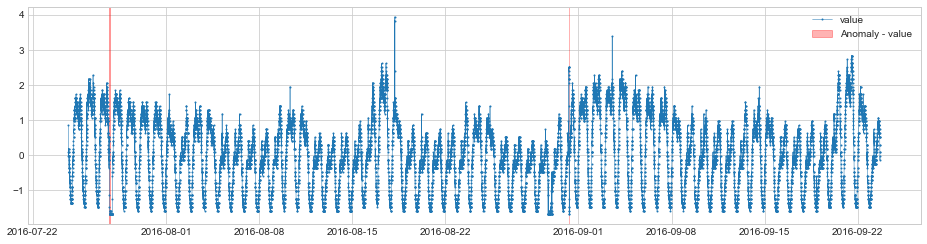

In [6]:
from adtk.detector import LevelShiftAD
from adtk.visualization import plot
# c (float, optional) – Factor used to determine the bound of normal range based on historical interquartile range. Default: 6.0.
level_shift_ad = LevelShiftAD(c=6.0, side='both', window=12)
anomalies = level_shift_ad.fit_detect(s)
plot(s, anomaly=anomalies, anomaly_color='red');

LevelShiftAD has detected several anomalies. To zoom into the anomolies detected, run the following code:

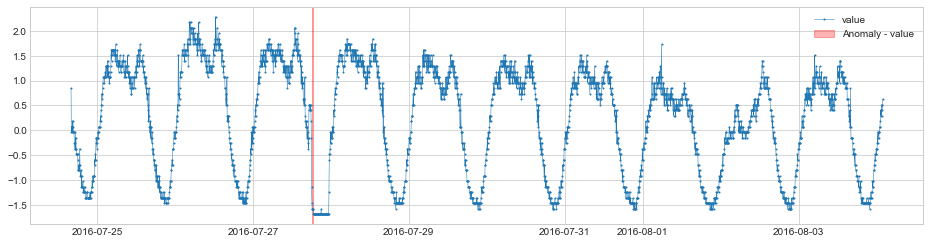

In [7]:
plot(s[0:3000], anomaly=anomalies[0:3000], anomaly_color='red');

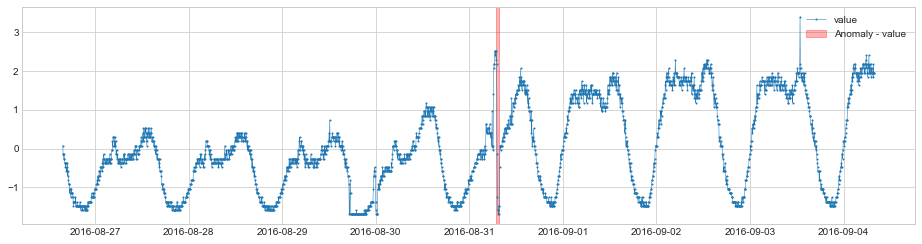

In [8]:
plot(s[9500:12000], anomaly=anomalies[9500:12000], anomaly_color='red');